# Diamond Price Prediction
Analyze diamonds by their cut, color, clarity, carat, price, and other attributes

#### Content:

- price in US dollars (\$ 326--\$18,823)
- carat weight of the diamond (0.2--5.01)
- cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- color diamond colour, from J (worst) to D (best)
- clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- x length in mm (0--10.74)
- y width in mm (0--58.9)
- z depth in mm (0--31.8)
- depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
- table width of top of diamond relative to widest point (43--95)

# 1. Import Necessary Libraries

In [458]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# 2. Read data
Dataset stored at the location 'Mini Project/diamonds.csv.csv'

In [459]:
path = r'C:\Users\Vinitha\Desktop\Mini Project\diamonds.csv'
df = pd.read_csv(path)

In [460]:
#head
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [433]:
#tail
df.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [434]:
#shape
df.shape

(53940, 11)

# 3. Data Exploration & Wrangling

In [435]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [436]:
#checking for null value
df.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [437]:
#droping column: Unnamed: 0
df = df.drop([ 'Unnamed: 0'], axis = 1)

In [438]:
#finding duplicate value
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [439]:
#finding min, max values
print(df.describe().T[['min', 'max']])

         min       max
carat    0.2      5.01
depth   43.0     79.00
table   43.0     95.00
price  326.0  18823.00
x        0.0     10.74
y        0.0     58.90
z        0.0     31.80


In [440]:
#removing columns where dimensions are zero
df = df.drop(df[df['x'] ==0].index)
df = df.drop(df[df['y'] ==0].index)
df = df.drop(df[df['z'] ==0].index)
df.shape

(53775, 10)

In [441]:
#data type
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [442]:
#dropping remove missing values from dataframe
df.dropna(inplace=True)

In [443]:
#shape
df.shape

(53775, 10)

# 4. Exploratory Data Analysis (EDA)

## 4.1 Basic statistics

In [444]:
#basic statistics of numerical columns
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
carat,53775.0,0.80,0.47,0.20,0.40,0.70,1.04,5.01
depth,53775.0,61.75,1.43,43.00,61.00,61.80,62.50,79.00
table,53775.0,57.46,2.23,43.00,56.00,57.00,59.00,95.00
price,53775.0,3931.22,3985.92,326.00,951.00,2401.00,5324.00,18823.00
x,53775.0,5.73,1.12,3.73,4.71,5.70,6.54,10.74
y,53775.0,5.73,1.14,3.68,4.72,5.71,6.54,58.90
z,53775.0,3.54,0.70,1.07,2.91,3.53,4.03,31.80


In [445]:
#describe - non numerical columns
df.describe(include = 'object').round(2)

,cut,color,clarity
count,53775,53775,53775
unique,5,7,8
top,Ideal,G,SI1
freq,21485,11254,13030


## 4.2 Visualizations

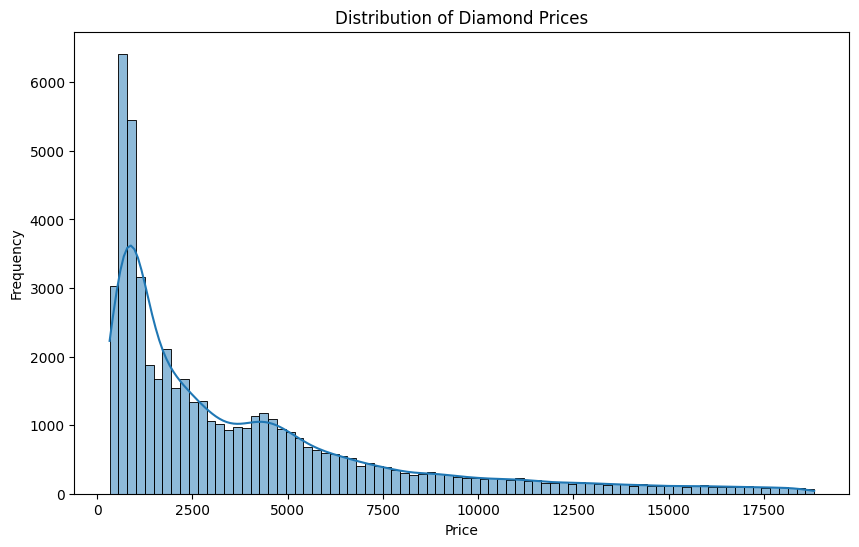

In [446]:
# histogram to understand distibution

plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True)
plt.title('Distribution of Diamond Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

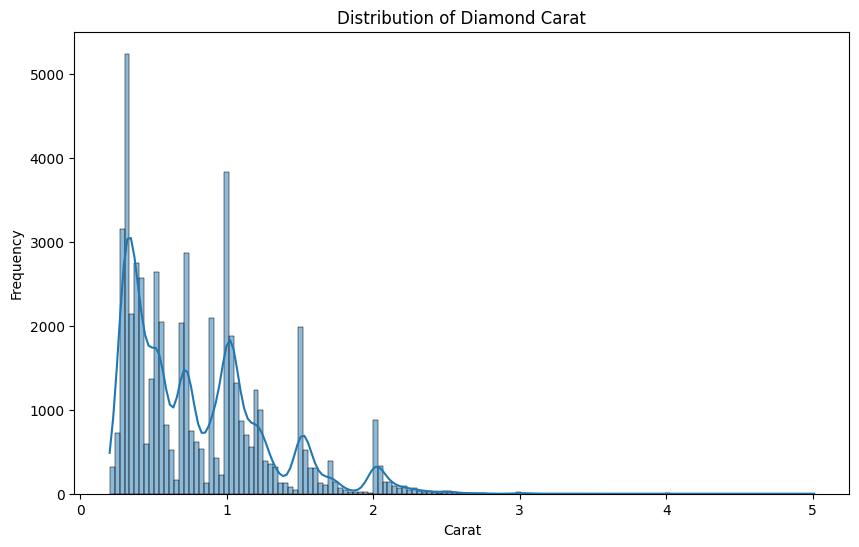

In [447]:
# histogram to understand distibution

plt.figure(figsize=(10, 6))
sns.histplot(df['carat'], kde=True)
plt.title('Distribution of Diamond Carat')
plt.xlabel('Carat')
plt.ylabel('Frequency')
plt.show()

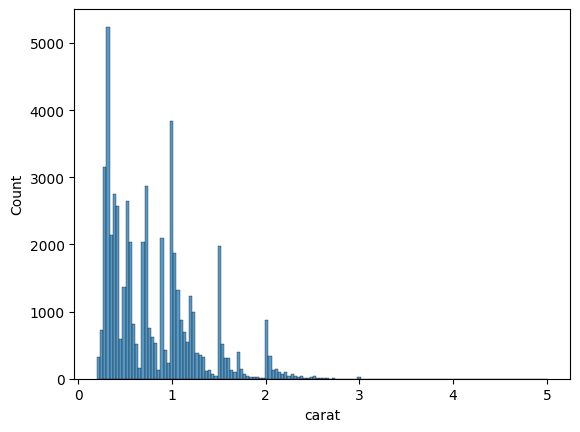

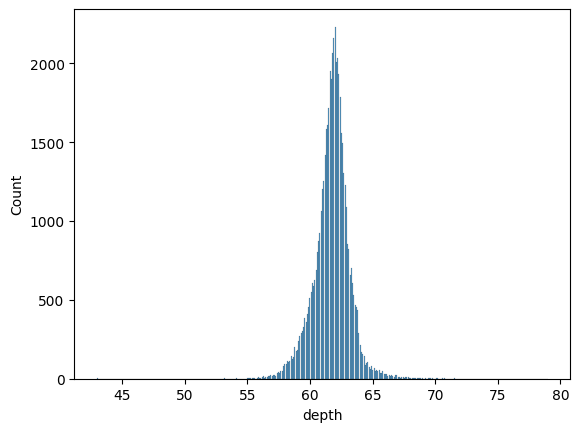

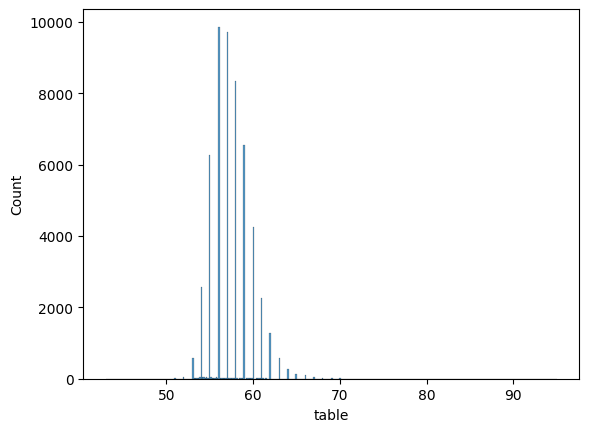

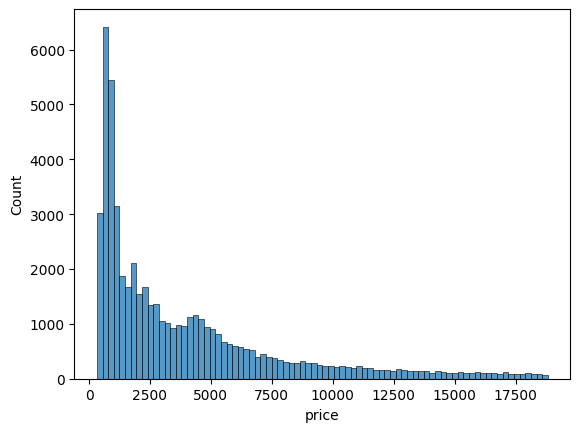

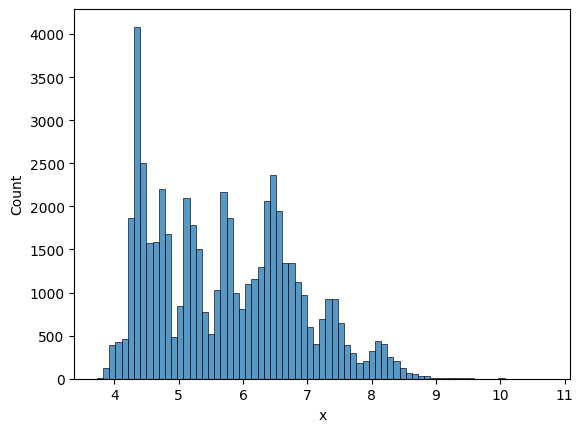

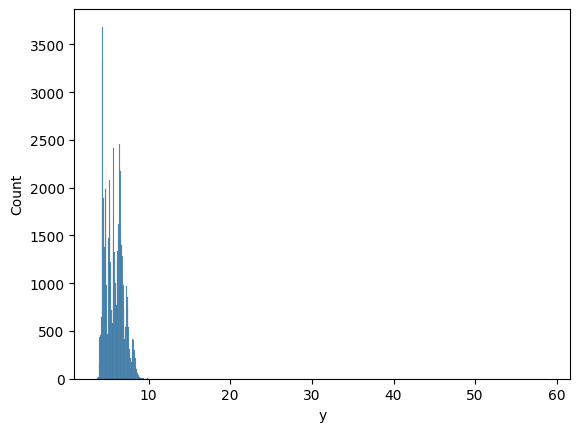

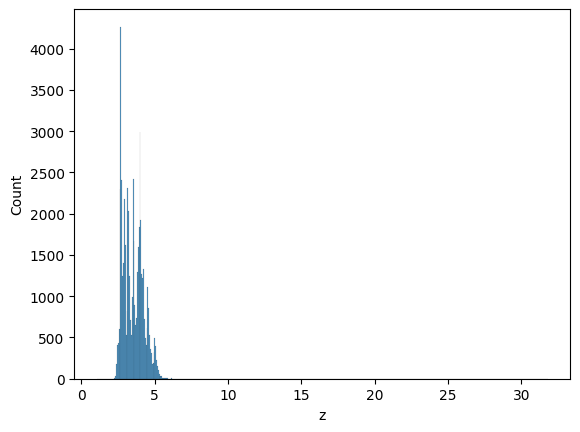

In [448]:
#histogram to understand distibution

for i in df.select_dtypes(include = 'number').columns:
        sns.histplot(data = df , x =i)
        plt.show()

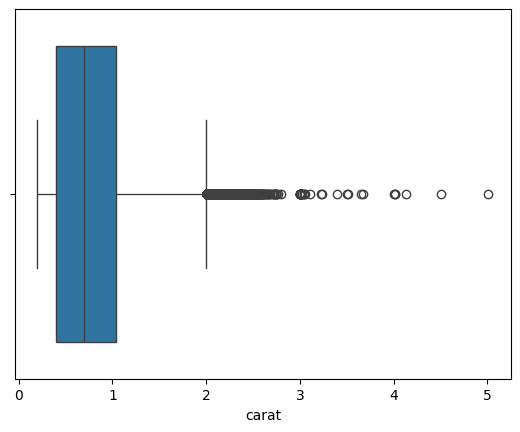

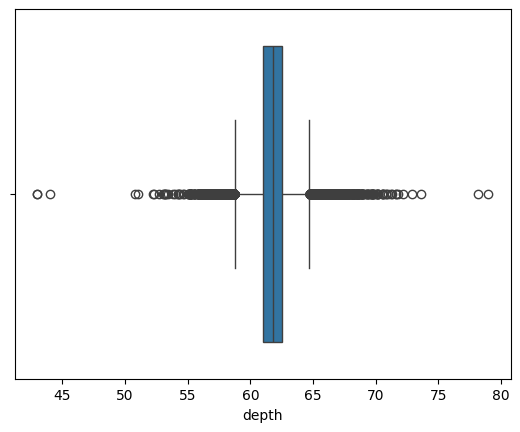

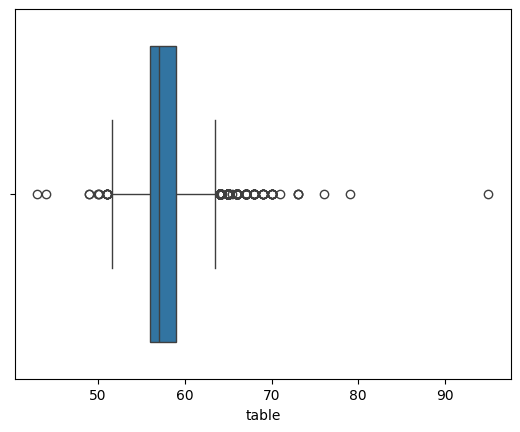

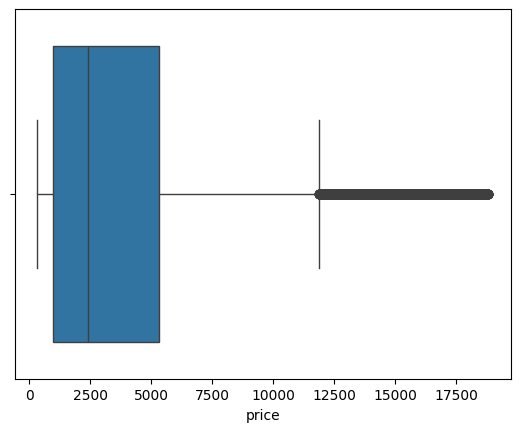

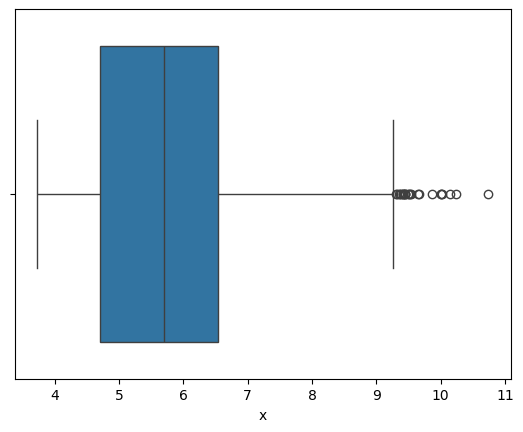

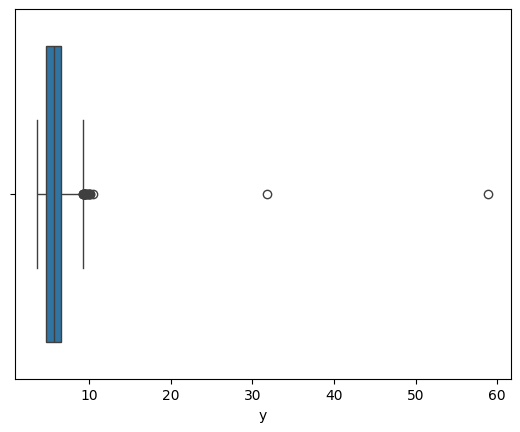

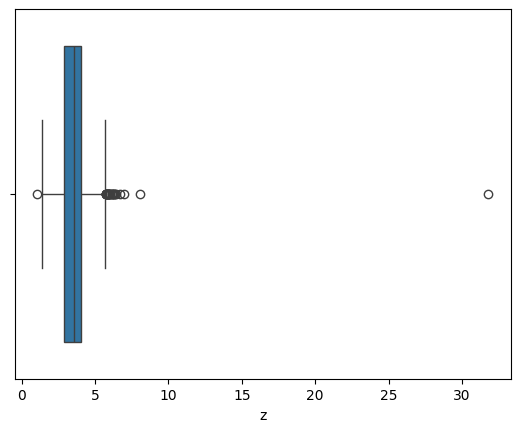

In [449]:
#boxplot to identify outliers
for i in df.select_dtypes(include = 'number').columns:
    sns.boxplot(data = df , x =i)
    plt.show()

## 4.3 Outlier Detection

In [450]:
#identifying ouliers using the Interquartile Range (IQR) method

columns_to_check = ['x', 'y', 'z', 'depth', 'table']

df = df.copy()
def detect_outliers(df, columns):
    outliers = {}
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return outliers

outliers = detect_outliers(df, columns_to_check)
outliers_count = sum(len(outlier_values) for outlier_values in outliers.values())
outliers_count

3201

In [451]:
#removing outliers from the dataframe

outlier_indices = set()
for outlier_values in outliers.values():
    outlier_indices.update(outlier_values.index)
df = df.drop(index=outlier_indices)

In [452]:
#shape

df.shape

(50843, 10)

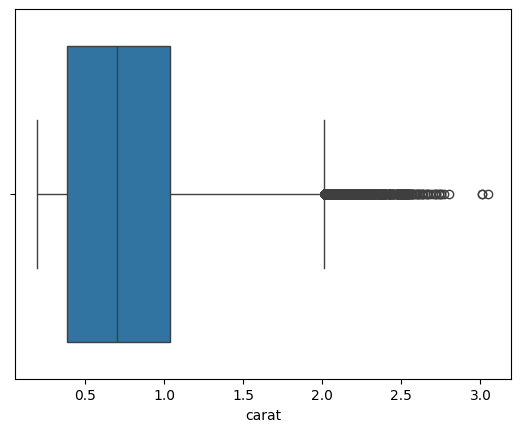

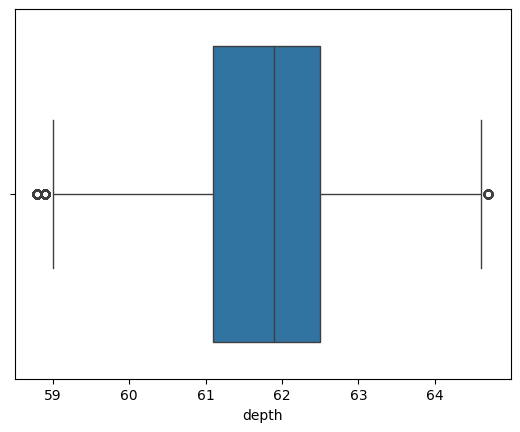

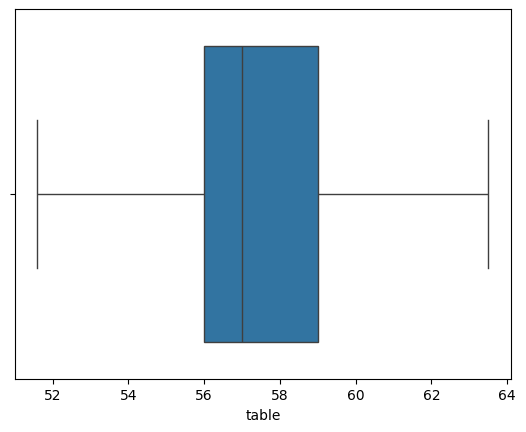

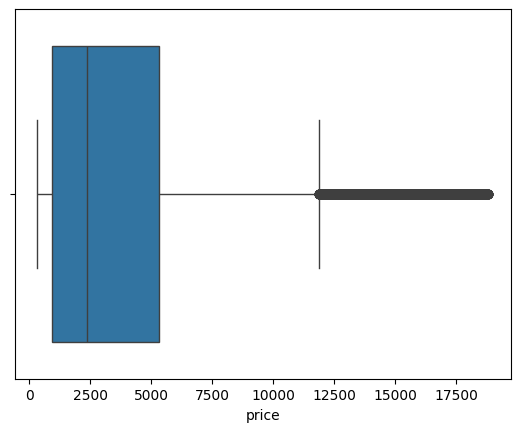

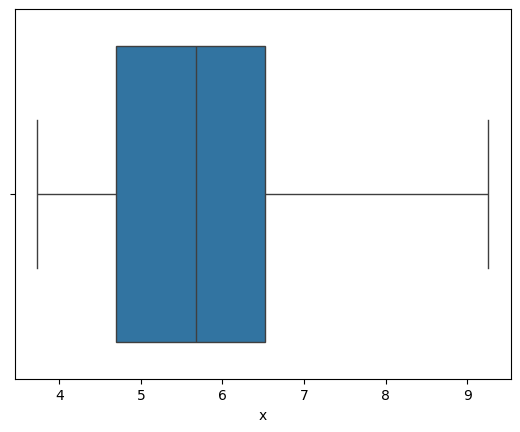

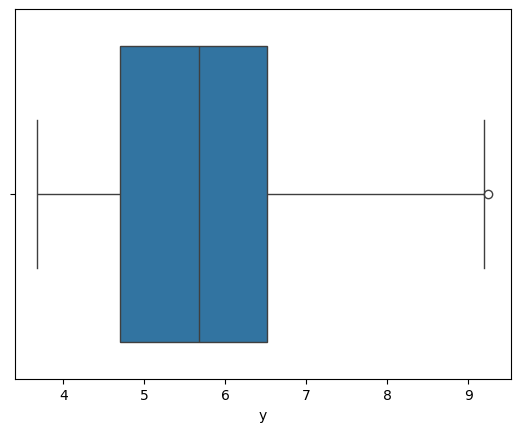

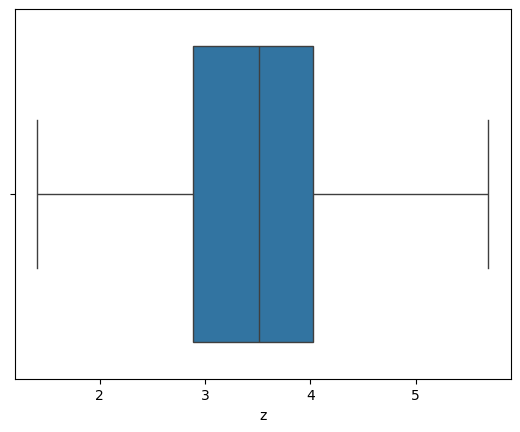

In [455]:
#boxplot to identify outliers

for i in df.select_dtypes(include = 'number').columns:
    sns.boxplot(data = df , x =i)
    plt.show()

## 4.4 Scatter matrix

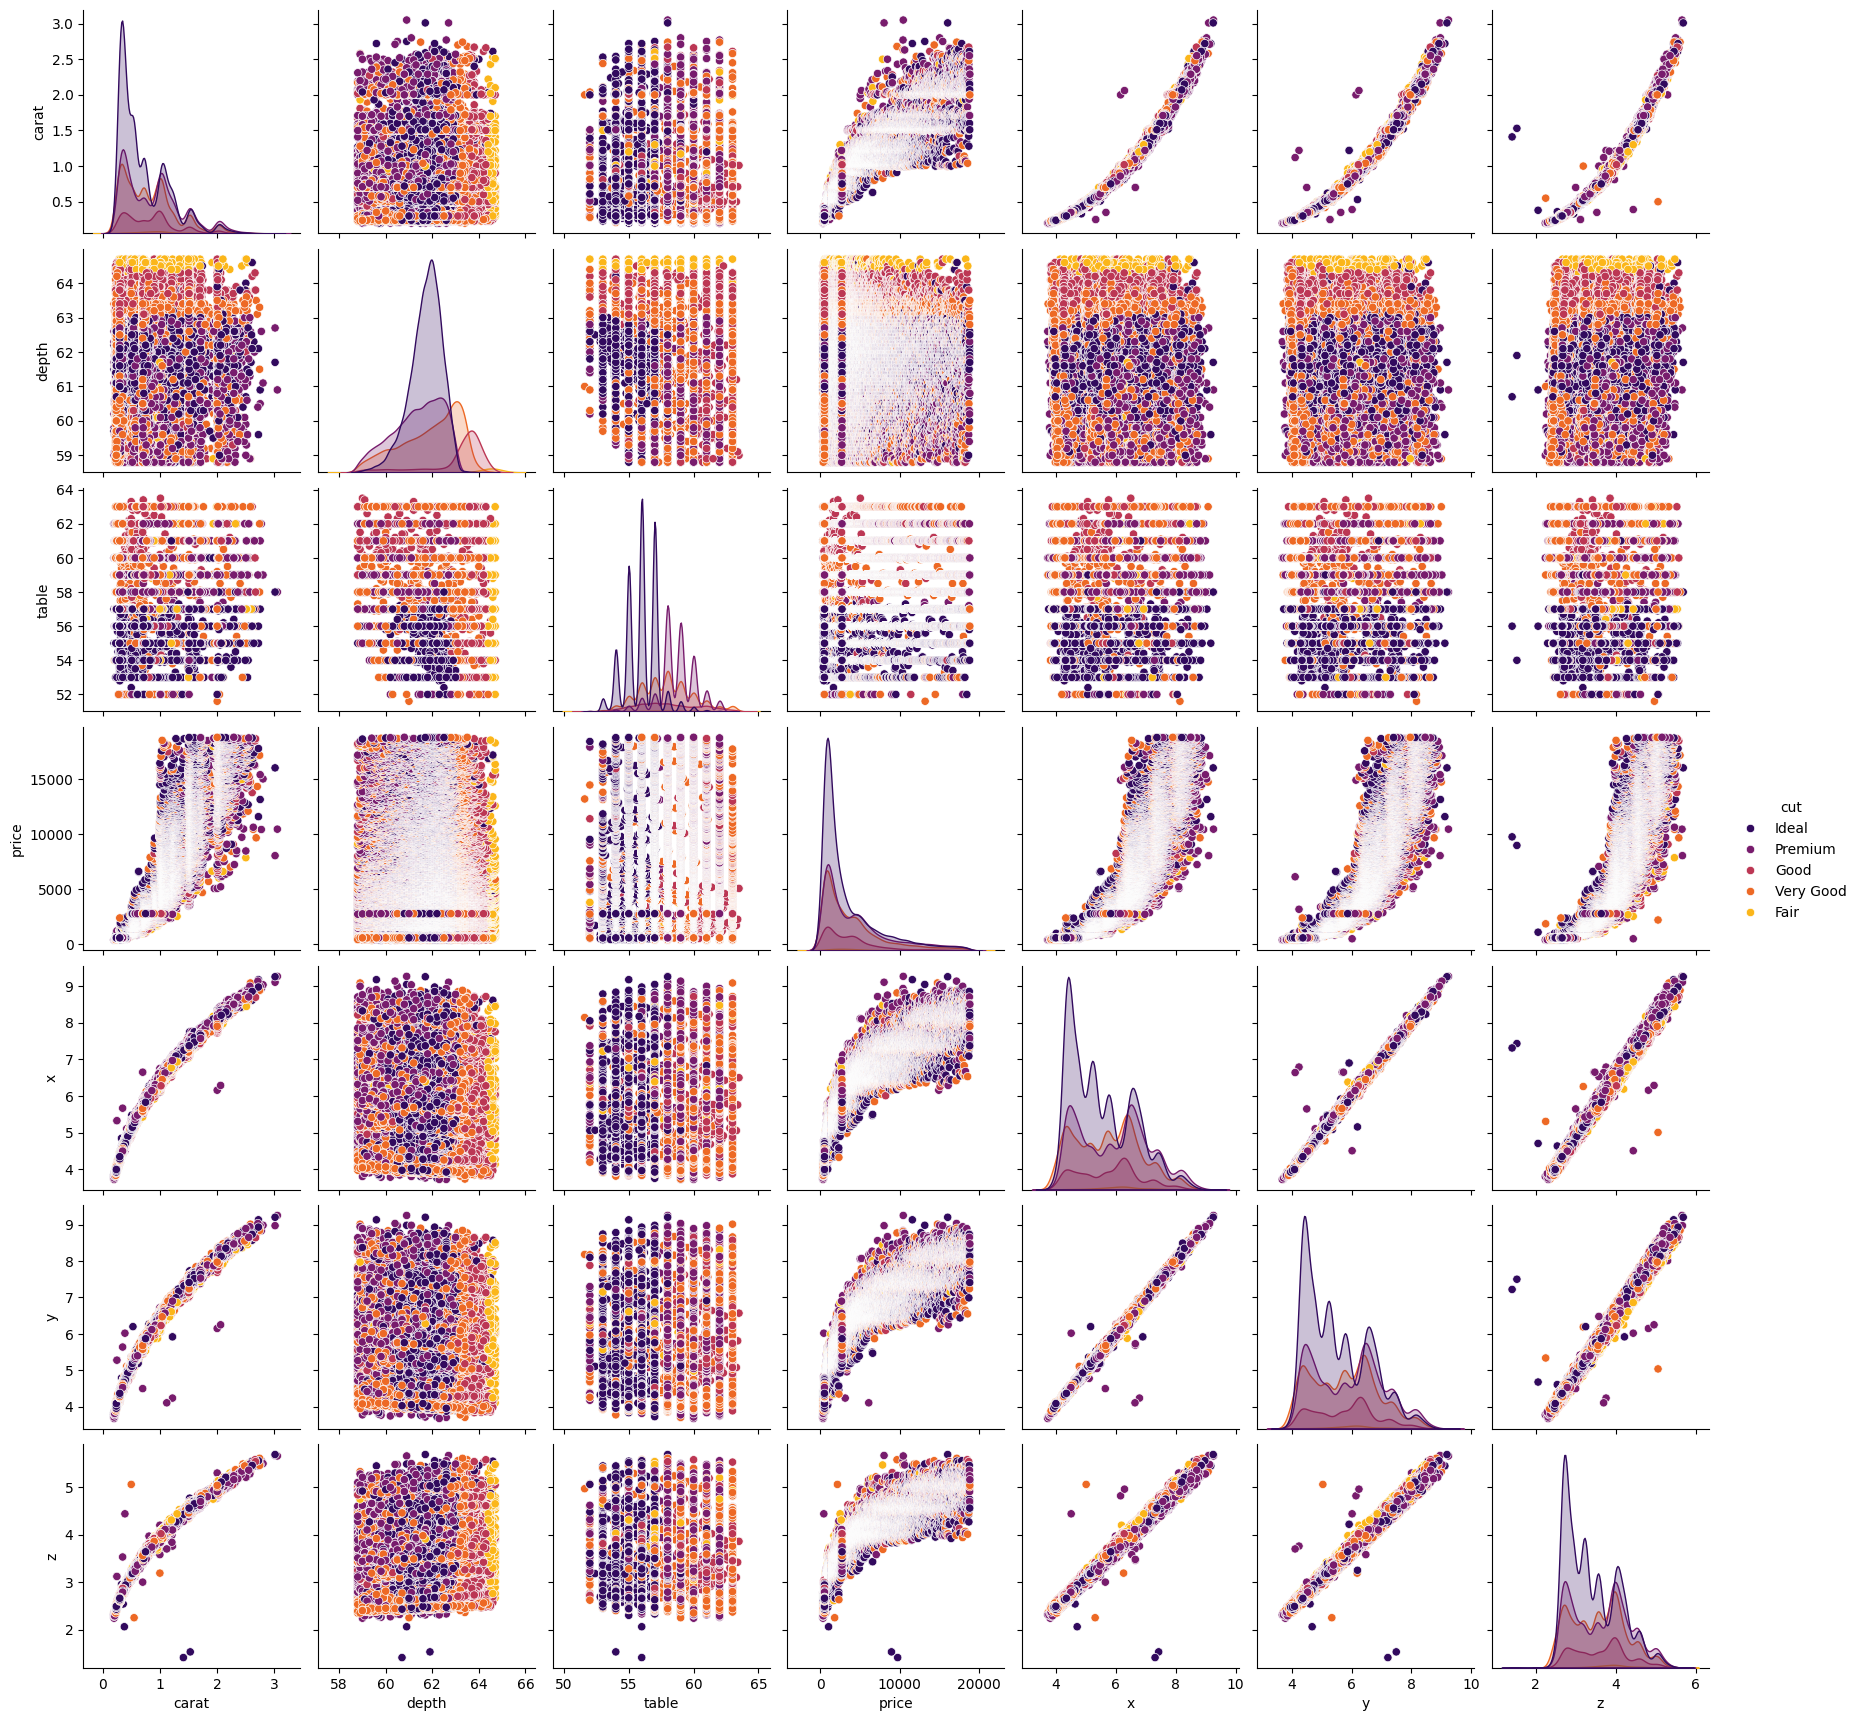

In [454]:
# scatterplot 

sns.pairplot(df,hue ='cut', palette='inferno')
plt.show()

## 4.5 Correlation matrix
Pearson correlation matrix   '


In [456]:
#correlation matrix
numeric = df.select_dtypes(include=['number'])

# Compute correlation matrix
numeric.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.021511,0.187974,0.927191,0.980088,0.979367,0.978981
depth,0.021511,1.000000,-0.243470,-0.007412,-0.017773,-0.019384,0.076143
table,0.187974,-0.243470,1.000000,0.137751,0.192589,0.187857,0.167701
price,0.927191,-0.007412,0.137751,1.000000,0.890460,0.891526,0.887447
x,0.980088,-0.017773,0.192589,0.890460,1.000000,0.998821,0.994499
y,0.979367,-0.019384,0.187857,0.891526,0.998821,1.000000,0.994336
z,0.978981,0.076143,0.167701,0.887447,0.994499,0.994336,1.000000


<Axes: >

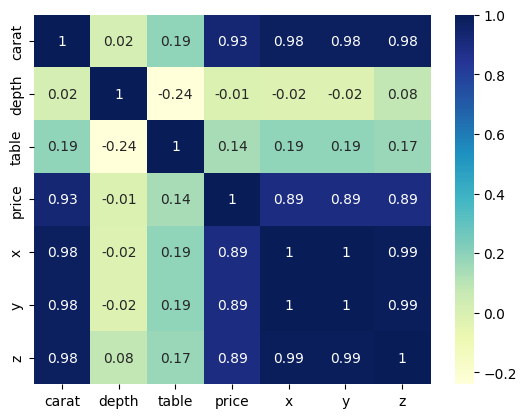

In [394]:
#correlation matrix
numeric = df.select_dtypes(include=['number'])

# Compute correlation matrix
numeric.corr()
#heatmap to visualize correlation matrix
sns.heatmap(numeric.corr().round(2), annot=True, cmap='YlGnBu')

# 6. Building Regression Models to find the most accurate

## 6.1 Importing libraries

In [395]:
#import required libraries

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,mean_absolute_percentage_error
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score

## 6.2 Feature Encoding


In [396]:
# Create a list categorical data to encode

cat_col = df.select_dtypes(exclude = ['float64', 'int64']).columns.tolist()
cat_col

['cut', 'color', 'clarity']

In [397]:
#converting categorical to numeric columns

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder.fit(df[cat_col])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [398]:
# initialize labelEncoder
label_encoders = {}

# fit the encoder & transform the data
for col in cat_col:
    label_encoders[col] = LabelEncoder()
    df[col + '_encoded'] = label_encoders[col].fit_transform(df[col])

df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_encoded,color_encoded,clarity_encoded
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,2,1,3
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,3,1,2
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,3,5,5
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1,6,3
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,4,6,7


In [399]:
#dropping the categorical columns
df.drop(columns = cat_col, inplace = True)
df.head(1)

,carat,depth,table,price,x,y,z,cut_encoded,color_encoded,clarity_encoded
0,0.23,61.5,55.0,326,3.95,3.98,2.43,2,1,3


In [400]:
df.corr()

,carat,depth,table,price,x,y,z,cut_encoded,color_encoded,clarity_encoded
carat,1.000000,0.021511,0.187974,0.927191,0.980088,0.979367,0.978981,0.063509,0.288616,-0.202836
depth,0.021511,1.000000,-0.243470,-0.007412,-0.017773,-0.019384,0.076143,-0.175843,0.041790,-0.043847
table,0.187974,-0.243470,1.000000,0.137751,0.192589,0.187857,0.167701,0.301039,0.029918,-0.084097
price,0.927191,-0.007412,0.137751,1.000000,0.890460,0.891526,0.887447,0.053478,0.170401,-0.069427
x,0.980088,-0.017773,0.192589,0.890460,1.000000,0.998821,0.994499,0.065805,0.267757,-0.216086
y,0.979367,-0.019384,0.187857,0.891526,0.998821,1.000000,0.994336,0.068235,0.267793,-0.213834
z,0.978981,0.076143,0.167701,0.887447,0.994499,0.994336,1.000000,0.050314,0.270669,-0.218205
cut_encoded,0.063509,-0.175843,0.301039,0.053478,0.065805,0.068235,0.050314,1.000000,0.012599,-0.006976
color_encoded,0.288616,0.041790,0.029918,0.170401,0.267757,0.267793,0.270669,0.012599,1.000000,-0.024591
clarity_encoded,-0.202836,-0.043847,-0.084097,-0.069427,-0.216086,-0.213834,-0.218205,-0.006976,-0.024591,1.000000


## 6.3 Split data into into training and testing sets

In [401]:
# define features and target

X = df.drop(columns = 'price') #independent variables (features)
y = df['price'] #dependent variable (target)

In [402]:
#split the data 80% training and 20% testing sets

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [403]:
#normalizing features using MinMaxScale

scaler = MinMaxScaler()
scaler.fit(X)

MinMaxScaler()

In [404]:
#transforming using MinMaxScale
X[:] = scaler.transform(X)

In [405]:
#checking the shape
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((40674, 9), (10169, 9), (40674,), (10169,))

## 6.4 Modelling 

### Evaluate Model Performance

### 1) Linear regression 

In [406]:
#creating linear regression model
model = LinearRegression()

#fit and train linear regression model
model.fit(X_train, y_train)

LinearRegression()

In [407]:
# saving the prediction values in y_pred
y_pred = model.predict(X_test)

In [408]:
# Calculating the Mean Squared Error (MSE) and R² Score (Coefficient of Determination))
# calculating Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE)

print('Linear Regression:','\n')

print( 'Test Score: ' ,model.score(X_test,y_test))
print('MSE: ', mean_squared_error(y_test, y_pred))
print('R^2 Score: ',r2_score(y_test, y_pred))
print("MAE: ", mean_absolute_error(y_test, y_pred))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: ', rmse)

Linear Regression: 

Test Score:  0.9015055153768026
MSE:  1538660.5540728536
R^2 Score:  0.9015055153768026
MAE:  808.0250916998806
RMSE:  1240.4275690554664


In [409]:
# Calculating Intercept and Coefficient

print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")

Intercept: 11585.993864170048
Coefficient: 12593.450674043494


### 2) Lasso regression model

In [410]:
#creating lasso regression model

from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha = 0.1, max_iter =100, tol =0.1)

#fit and train linear regression model
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.1, max_iter=100, tol=0.1)

In [411]:
# saving the prediction values in lasso_pred
lasso_pred =lasso_model.predict(X_test)

In [412]:
# Calculating the Mean Squared Error (MSE) and R² Score (Coefficient of Determination))
# calculating Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE)

print('Lasso Regression:','\n')

print( 'Test Score: ' ,lasso_model.score(X_test,y_test))
print('MSE: ', mean_squared_error(y_test, lasso_pred))
print('R^2 Score: ',r2_score(y_test, lasso_pred))
print("MAE: ", mean_absolute_error(y_test, lasso_pred))
rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))
print('RMSE: ', rmse)

Lasso Regression: 

Test Score:  0.891664780655417
MSE:  1692390.4852138418
R^2 Score:  0.891664780655417
MAE:  889.7844148752827
RMSE:  1300.9190924933962


In [413]:
# Calculating Intercept and Coefficient

print(f"Intercept: {lasso_model.intercept_}")
print(f"Coefficient: {lasso_model.coef_[0]}")

Intercept: 8624.07852896317
Coefficient: 8501.666527090661


### 3) Ridge regression model

In [414]:
#creating ridge regression model

from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha = 0.1, max_iter =100, tol =0.1)

# Fit the model
ridge_model.fit(X_train, y_train)

Ridge(alpha=0.1, max_iter=100, tol=0.1)

In [415]:
# saving the prediction values in ridge_pred
ridge_pred =ridge_model.predict(X_test)

In [416]:
# Calculating the Mean Squared Error (MSE) and R² Score (Coefficient of Determination))
# calculating Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE)

print('Ridge Regression:','\n')

print( 'Test Score: ' ,ridge_model.score(X_test,y_test))
print('MSE: ', mean_squared_error(y_test, ridge_pred))
print('R^2 Score: ',r2_score(y_test, ridge_pred))
print("MAE: ", mean_absolute_error(y_test, ridge_pred))
rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))
print('RMSE: ', rmse)

Ridge Regression: 

Test Score:  0.9015046199355482
MSE:  1538674.5424717155
R^2 Score:  0.9015046199355482
MAE:  808.0466956121
RMSE:  1240.4332075818172


In [417]:
# Calculating Intercept and Coefficient

print(f"Intercept: {ridge_model.intercept_}")
print(f"Coefficient: {ridge_model.coef_[0]}")

Intercept: 11598.363703708585
Coefficient: 12589.323449200185


### 4) Random Forest regression model

In [418]:
#creating ridge regression model

from sklearn.ensemble import RandomForestRegressor

# Initialize the RandomForestRegressor
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [419]:
# saving the prediction values in rf_pred
rf_pred = random_forest_model.predict(X_test)

In [420]:
# Calculating the Mean Squared Error (MSE) and R² Score (Coefficient of Determination))
# calculating Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE)

print('Random Forest Regression:','\n')

print( 'Test Score: ' ,random_forest_model.score(X_test,y_test))
print('MSE: ', mean_squared_error(y_test, rf_pred))
print('R^2 Score: ',r2_score(y_test, rf_pred))
print("MAE: ", mean_absolute_error(y_test, rf_pred))
rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
print('RMSE: ', rmse)

Random Forest Regression: 

Test Score:  0.98171267057259
MSE:  285680.8940819037
R^2 Score:  0.98171267057259
MAE:  260.45452510430863
RMSE:  534.4912479001912


### Model Test Scores

Below are the test scores for different regression models:

| **Model**                | **Test Score (R²)** |
|--------------------------|---------------------|
| Lasso Regression         | 0.901               |
| Linear Regression        | 0.891               |
| Ridge Regression         | 0.901               |
| Random Forest Regression | **0.981**           |: 


**Random Forest Regression** shows the highest test score (𝑅2 = 0.981), indicating that it explains a significant portion of the variance in the target variable (price). 

This model is the **most effective among the ones tested**, suggesting it captures complex relationships and interactions between features better than the others.

## 6.5 Predicting table of actual price and predicted values

In [421]:
#actual values and predicted values

ActVsPred =pd.DataFrame({'Actual Value':y_test,'Predicted Value':rf_pred.round()})
ActVsPred

,Actual Value,Predicted Value
4853,3710,3538.0
26310,15811,17024.0
3906,3493,3110.0
2693,3246,3131.0
23948,12084,12051.0
...,...,...
10132,4720,4764.0
19519,8151,8501.0
36470,943,1010.0
16596,6628,6354.0


## 6.6 Perform Cross-Validation

In [422]:
from sklearn.model_selection import cross_val_score

# Cross-validation

cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
print(f"Cross-validated R^2 Scores: {cv_scores}")
print(f"Average Cross-validated R^2 Score: {cv_scores.mean()}")

Cross-validated R^2 Scores: [0.89488577 0.89353129 0.89865888 0.89969162 0.89393054]
Average Cross-validated R^2 Score: 0.8961396183825133


This analysis confirms that the selected model is  **effective and reliable**  in predicting the target variable, as evidenced by the high average 𝑅2 score.

## 6.7 Visualize Model Performance

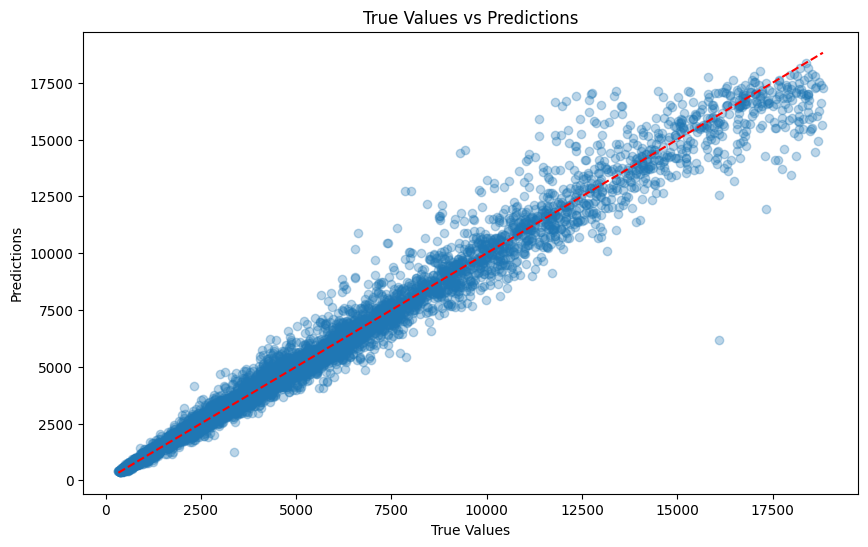

In [423]:
# Visualizing the Model Performance
# Plot Prediction vs. Actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_pred, alpha=0.3)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='red')  # Diagonal line
plt.show()

Shows how predicted values compare to actual values.